In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import numpy.linalg as la
import pandas as pd
from torchsummary import summary
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import LSTM, GRU
from keras.callbacks import History
history = History()

In [ ]:
data = [[2, 'Queens , Jamaica Bay', 40.6039936, -73.8354124], [4, 'Manhattan , Alphabet City', 40.7251022, -73.9795833], [5, 'Staten Island , Arden Heights', 40.5589568, -74.19649520491512], [6, 'Staten Island , Arrochar/Fort Wadsworth', 40.6028866, -74.064902], [7, 'Queens , Astoria', 40.7720145, -73.9302673], [8, 'Queens , Astoria Park', 40.7788277, -73.92265804019786], [9, 'Queens , Auburndale', 40.7614516, -73.7897239], [10, 'Queens , Baisley Park', 40.67592055, -73.78496487588887], [11, 'Brooklyn , Bath Beach', 40.6018495, -74.000501], [12, 'Manhattan , Battery Park', 40.703030749999996, -74.01578792289277], [13, 'Manhattan , Battery Park City', 40.7110166, -74.0169369], [14, 'Brooklyn , Bay Ridge', 40.6320062, -74.0232101], [16, 'Queens , Bayside', 40.7684351, -73.7770774], [17, 'Brooklyn , Bedford', 40.7187387, -73.9569017], [18, 'Bronx , Bedford Park', 40.8700999, -73.8856912], [19, 'Queens , Bellerose', 40.7190882, -73.7296367], [20, 'Bronx , Belmont', 40.8552778, -73.8863889], [21, 'Brooklyn , Bensonhurst East', 40.6128203, -73.9823123], [22, 'Brooklyn , Bensonhurst West', 40.612782, -74.0008633], [24, 'Manhattan , Bloomingdale', 40.7997764, -73.9677716], [25, 'Brooklyn , Boerum Hill', 40.68562615, -73.98417065807277], [26, 'Brooklyn , Borough Park', 40.633993, -73.9968059], [29, 'Brooklyn , Brighton Beach', 40.577621, -73.961376], [30, 'Queens , Broad Channel', 40.6080187, -73.8158007], [31, 'Bronx , Bronx Park', 44.950874999999996, -93.3676488106517], [32, 'Bronx , Bronxdale', 40.8506558, -73.8665241], [33, 'Brooklyn , Brooklyn Heights', 40.696084850000005, -73.9950278391265], [34, 'Brooklyn , Brooklyn Navy Yard', 40.6997716, -73.9753359], [35, 'Brooklyn , Brownsville', 40.665306, -73.9124755], [36, 'Brooklyn , Bushwick North', 40.7049856, -73.9289062], [37, 'Brooklyn , Bushwick South', 40.6942867, -73.92588360783884], [38, 'Queens , Cambria Heights', 40.6945474, -73.7384653], [39, 'Brooklyn , Canarsie', 40.643715, -73.9006921], [40, 'Brooklyn , Carroll Gardens', 40.6784201, -73.9948021], [42, 'Manhattan , Central Harlem North', 40.7992183, -73.9549001], [43, 'Manhattan , Central Park', 40.7827725, -73.9653627406542], [45, 'Manhattan , Chinatown', 40.7164913, -73.9962504], [46, 'Bronx , City Island', 40.84743325, -73.78642953814102], [48, 'Manhattan , Clinton East', 40.7181499, -73.9854353], [49, 'Brooklyn , Clinton Hill', 40.6897222, -73.9652778], [50, 'Manhattan , Clinton West', 40.7596864, -73.9956133], [51, 'Bronx , Co-Op City', 40.8738889, -73.8294444], [52, 'Brooklyn , Cobble Hill', 40.687547, -73.9973352], [53, 'Queens , College Point', 40.7876014, -73.8459682], [54, 'Brooklyn , Columbia Street', 40.6878211, -74.0013527], [55, 'Brooklyn , Coney Island', 40.57580705, -73.99217527476975], [56, 'Queens , Corona', 40.7469593, -73.8601456], [57, 'Queens , Corona', 40.7469593, -73.8601456], [58, 'Bronx , Country Club', 40.8391667, -73.8197222], [59, 'Bronx , Crotona Park', 40.83881315, -73.89239847631723], [60, 'Bronx , Crotona Park East', 40.8366261, -73.8925344], [61, 'Brooklyn , Crown Heights North', 40.6696946, -73.944948], [62, 'Brooklyn , Crown Heights South', 40.6694032, -73.9445802], [63, 'Brooklyn , Cypress Hills', 40.6899088, -73.8726597], [64, 'Queens , Douglaston', 40.768713, -73.7470765], [65, 'Brooklyn , Downtown Brooklyn/MetroTech', 40.69218, -73.985942], [66, 'Brooklyn , DUMBO/Vinegar Hill', 40.701519399999995, -73.98263570142457], [67, 'Brooklyn , Dyker Heights', 40.6204716, -74.0116668], [68, 'Manhattan , East Chelsea', 40.7471784, -73.982025], [69, 'Bronx , East Concourse/Concourse Village', 40.8240556, -73.9192925], [70, 'Queens , East Elmhurst', 40.7612123, -73.8651358], [73, 'Queens , East Flushing', 40.757536599999995, -73.78430452865169], [74, 'Manhattan , East Harlem North', 40.803225, -73.94172762319079], [75, 'Manhattan , East Harlem South', 40.8009185, -73.9295154], [76, 'Brooklyn , East New York', 40.6667702, -73.8823583], [77, 'Brooklyn , East New York/Pennsylvania Avenue', 40.6646501, -73.894767], [78, 'Bronx , East Tremont', 40.8453781, -73.8909693], [79, 'Manhattan , East Village', 40.7292688, -73.9873613], [80, 'Brooklyn , East Williamsburg', 40.7119945, -73.9671403], [81, 'Bronx , Eastchester', 40.8884329, -73.8281895], [82, 'Queens , Elmhurst', 40.7365804, -73.8783932], [85, 'Brooklyn , Erasmus', 40.6495482, -73.9559714], [86, 'Queens , Far Rockaway', 40.6053825, -73.7551326], [87, 'Manhattan , Financial District North', 40.7121392, -74.0131756], [88, 'Manhattan , Financial District South', 40.7017103, -74.0131489], [89, 'Brooklyn , Flatbush/Ditmas Park', 40.6393842, -73.9642875], [90, 'Manhattan , Flatiron', 40.741059199999995, -73.98964162240998], [91, 'Brooklyn , Flatlands', 40.6212155, -73.9348597], [92, 'Queens , Flushing', 40.7654301, -73.8174291], [94, 'Bronx , Fordham South', 40.8636237, -73.887748327829], [95, 'Queens , Forest Hills', 40.7195942, -73.8448553], [97, 'Brooklyn , Fort Greene', 40.6907711, -73.9766245], [98, 'Queens , Fresh Meadows', 40.7348246, -73.7934668], [99, 'Staten Island , Freshkills Park', 40.5791894, -74.17996750759133], [100, 'Manhattan , Garment District', 40.7536941, -73.9905167], [101, 'Queens , Glen Oaks', 40.7470463, -73.7115199], [102, 'Queens , Glendale', 40.7014917, -73.8868028], [106, 'Brooklyn , Gowanus', 40.6791695, -73.9885041], [107, 'Manhattan , Gramercy', 40.7355189, -73.9840794], [108, 'Brooklyn , Gravesend', 40.5961338, -73.9739426], [109, 'Staten Island , Great Kills', 40.5513353, -74.151201], [110, 'Staten Island , Great Kills Park', 40.548161, -74.1262534], [111, 'Brooklyn , Green-Wood Cemetery', 40.65220295, -73.99107685810596], [112, 'Brooklyn , Greenpoint', 40.7237134, -73.9509714], [113, 'Manhattan , Greenwich Village North', 40.7317312, -73.9976185], [114, 'Manhattan , Greenwich Village South', 40.7299438, -73.9973576], [116, 'Manhattan , Hamilton Heights', 40.8241451, -73.9500618], [117, 'Queens , Hammels/Arverne', 40.5871898, -73.8111059], [119, 'Bronx , Highbridge', 40.83653245, -73.92959563928643], [120, 'Manhattan , Highbridge Park', 40.84591775, -73.92984478686536], [122, 'Queens , Hollis', 40.7134361, -73.7670772], [123, 'Brooklyn , Homecrest', 40.58611335, -73.95731014951107], [124, 'Queens , Howard Beach', 40.6578815, -73.8362459], [125, 'Manhattan , Hudson Sq', 40.7268035, -74.0079833], [126, 'Bronx , Hunts Point', 40.8126008, -73.8840247], [127, 'Manhattan , Inwood', 40.8692579, -73.9204949], [128, 'Manhattan , Inwood Hill Park', 40.87227365, -73.9254270915026], [129, 'Queens , Jackson Heights', 40.7556561, -73.8857755], [130, 'Queens , Jamaica', 40.7029134, -73.8006429], [131, 'Queens , Jamaica Estates', 40.71334555, -73.78251095420785], [132, 'Queens , JFK Airport', 40.642947899999996, -73.7793733748521], [133, 'Brooklyn , Kensington', 40.6462149, -73.970694], [134, 'Queens , Kew Gardens', 40.7095633, -73.8307965], [135, 'Queens , Kew Gardens Hills', 40.7159628, -73.8328014], [136, 'Bronx , Kingsbridge Heights', 40.8725702, -73.9026619], [137, 'Manhattan , Kips Bay', 40.7395463, -73.9770832], [138, 'Queens , LaGuardia Airport', 40.7757145, -73.87336398511545], [139, 'Queens , Laurelton', 40.6667703, -73.7515212], [140, 'Manhattan , Lenox Hill East', 40.7672618, -73.966522], [141, 'Manhattan , Lenox Hill West', 40.767694649999996, -73.96471689217381], [143, 'Manhattan , Lincoln Square West', 40.7737889, -73.9819984], [144, 'Manhattan , Little Italy/NoLiTa', 40.7210061, -73.9947024], [145, 'Queens , Long Island City/Hunters Point', 40.7424147, -73.9481036], [146, 'Queens , Long Island City/Queens Plaza', 40.750607, -73.9402599], [147, 'Bronx , Longwood', 40.8162916, -73.8962205], [148, 'Manhattan , Lower East Side', 40.7159357, -73.9868057], [149, 'Brooklyn , Madison', 40.6105009, -73.94765849957773], [150, 'Brooklyn , Manhattan Beach', 40.5766309, -73.9409798480918], [151, 'Manhattan , Manhattan Valley', 40.7997764, -73.9677716], [152, 'Manhattan , Manhattanville', 40.8157775, -73.951554], [153, 'Manhattan , Marble Hill', 40.8762983, -73.9104292], [156, 'Staten Island , Mariners Harbor', 40.6367701, -74.1587547], [157, 'Queens , Maspeth', 40.723158, -73.912637], [158, 'Manhattan , Meatpacking/West Village West', 40.7408956, -74.0052344], [159, 'Bronx , Melrose South', 40.8183333, -73.9027778], [160, 'Queens , Middle Village', 40.718215650000005, -73.87867154730415], [161, 'Manhattan , Midtown Center', 40.75925755, -73.97995686116377], [162, 'Manhattan , Midtown East', 40.7598219, -73.9724708], [163, 'Manhattan , Midtown North', 40.7649371, -73.9850825], [164, 'Manhattan , Midtown South', 40.7498417, -73.984251], [165, 'Brooklyn , Midwood', 40.6188823, -73.9654889], [166, 'Manhattan , Morningside Heights', 40.81, -73.9625], [167, 'Bronx , Morrisania/Melrose', 40.8256703, -73.9152416], [168, 'Bronx , Mott Haven/Port Morris', 40.8034452, -73.917871], [169, 'Bronx , Mount Hope', 40.8525714, -73.90534040085426], [170, 'Manhattan , Murray Hill', 40.7481574, -73.97875], [171, 'Queens , Murray Hill-Queens', 40.7430865, -73.9611197], [174, 'Bronx , Norwood', 40.8772593, -73.8768626], [175, 'Queens , Oakland Gardens', 40.753991, -73.765966], [176, 'Staten Island , Oakwood', 40.563994, -74.1159754], [177, 'Brooklyn , Ocean Hill', 40.6757317, -73.9124338], [178, 'Brooklyn , Ocean Parkway South', 40.5854595, -73.96487147170009], [180, 'Queens , Ozone Park', 40.67677, -73.8437461], [181, 'Brooklyn , Park Slope', 40.6701033, -73.9859723], [182, 'Bronx , Parkchester', 40.8332047, -73.8609723], [183, 'Bronx , Pelham Bay', 40.8662112, -73.7895774], [184, 'Bronx , Pelham Bay Park', 40.852548, -73.827938], [185, 'Bronx , Pelham Parkway', 40.857229, -73.8676281], [187, 'Staten Island , Port Richmond', 40.6331592, -74.1365318], [188, 'Brooklyn , Prospect-Lefferts Gardens', 40.68035905, -73.957633], [189, 'Brooklyn , Prospect Heights', 40.6778708, -73.9684725], [190, 'Brooklyn , Prospect Park', 40.661774300000005, -73.97108902901994], [191, 'Queens , Queens Village', 40.7175718, -73.7359328], [192, 'Queens , Queensboro Hill', 40.742901950000004, -73.82517691472333], [193, 'Queens , Queensbridge/Ravenswood', 40.758403, -73.93916185149254], [194, 'Manhattan , Randalls Island', 40.793938999999995, -73.91761017748043], [195, 'Brooklyn , Red Hook', 40.6751032, -74.0095841], [196, 'Queens , Rego Park', 40.72286495, -73.86210223976741], [197, 'Queens , Richmond Hill', 40.6994253, -73.8309672], [198, 'Queens , Ridgewood', 40.7080556, -73.9141667], [199, 'Bronx , Rikers Island', 40.79193175, -73.88349371727949], [201, 'Queens , Rockaway Park', 40.5805104, -73.8361535], [202, 'Manhattan , Roosevelt Island', 40.76133675, -73.95028526170718], [203, 'Queens , Rosedale', 40.6620479, -73.7354097], [204, 'Staten Island , Rossville/Woodrow', 40.542642799999996, -74.20698511828994], [205, 'Queens , Saint Albans', 40.6984364, -73.7606881], [206, 'Staten Island , Saint George/New Brighton', 40.64178665, -74.07841152113366], [208, 'Bronx , Schuylerville/Edgewater Park', 40.821982, -73.8187004], [209, 'Manhattan , Seaport', 40.7057505, -74.0029056], [210, 'Brooklyn , Sheepshead Bay', 40.5912161, -73.9445822], [211, 'Manhattan , SoHo', 40.72288, -73.9987505], [215, 'Queens , South Jamaica', 40.69567495, -73.79420266473011], [216, 'Queens , South Ozone Park', 40.6701035, -73.8190231], [217, 'Brooklyn , South Williamsburg', 33.775115, -79.59923], [219, 'Queens , Springfield Gardens South', 40.683938, -73.7379765], [220, 'Bronx , Spuyten Duyvil/Kingsbridge', 40.8806984, -73.9077054123841], [221, 'Staten Island , Stapleton', 40.6279568, -74.0751652], [222, 'Brooklyn , Starrett City', 40.6478541, -73.87951545688418], [223, 'Queens , Steinway', 40.7745459, -73.9037477], [225, 'Brooklyn , Stuyvesant Heights', 40.67439655, -73.94404613465176], [226, 'Queens , Sunnyside', 40.7398242, -73.9354153], [227, 'Brooklyn , Sunset Park East', 40.6364667, -74.0083234], [228, 'Brooklyn , Sunset Park West', 40.6474105, -73.9959794], [232, 'Manhattan , Two Bridges/Seward Park', 40.714497800000004, -73.98854356054915], [234, 'Manhattan , Union Sq', 40.7360717, -73.9901888], [235, 'Bronx , University Heights/Morris Heights', 40.8540951, -73.9198195], [236, 'Manhattan , Upper East Side North', 40.768631299999996, -73.96473710434782], [237, 'Manhattan , Upper East Side South', 40.77946795, -73.9582649374], [238, 'Manhattan , Upper West Side North', 40.7797929, -73.9819947], [239, 'Manhattan , Upper West Side South', 40.7772311, -73.99005935788361], [240, 'Bronx , Van Cortlandt Park', 40.8970755, -73.8865797057321], [242, 'Bronx , Van Nest/Morris Park', 40.8539384, -73.8611454], [243, 'Manhattan , Washington Heights North', 40.840346800000006, -73.9407446392122], [245, 'Staten Island , West Brighton', 40.6345481, -74.1120867], [246, 'Manhattan , West Chelsea/Hudson Yards', 40.75391085, -74.00053573096068], [247, 'Bronx , West Concourse', 40.8263962, -73.9211598], [248, 'Bronx , West Farms/Bronx River', 40.8375001, -73.8734632], [249, 'Manhattan , West Village', 40.7341857, -74.00558], [251, 'Staten Island , Westerleigh', 40.621215, -74.1318094], [252, 'Queens , Whitestone', 40.7945457, -73.8184674], [253, 'Queens , Willets Point', 40.796708, -73.779396], [257, 'Brooklyn , Windsor Terrace', 40.65348695, -73.97719596197135], [258, 'Queens , Woodhaven', 40.6892698, -73.8579131], [259, 'Bronx , Woodlawn/Wakefield', 40.8937765, -73.8610822], [260, 'Queens , Woodside', 40.7453798, -73.9054145], [261, 'Manhattan , World Trade Center', 40.7119004, -74.012527], [262, 'Manhattan , Yorkville East', 40.783311, -73.9448639], [264, 'Unknown , NV', 39.2115779, -119.7325651]]

In [ ]:
import math
def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d


In [ ]:
accident = pd.read_csv('collision.csv')
print(accident.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


In [ ]:
a = {}
for i in data:
  a[(i[2],i[3])] = 0.0
print(a)

{(40.6039936, -73.8354124): 0.0, (40.7251022, -73.9795833): 0.0, (40.5589568, -74.19649520491512): 0.0, (40.6028866, -74.064902): 0.0, (40.7720145, -73.9302673): 0.0, (40.7788277, -73.92265804019786): 0.0, (40.7614516, -73.7897239): 0.0, (40.67592055, -73.78496487588887): 0.0, (40.6018495, -74.000501): 0.0, (40.703030749999996, -74.01578792289277): 0.0, (40.7110166, -74.0169369): 0.0, (40.6320062, -74.0232101): 0.0, (40.7684351, -73.7770774): 0.0, (40.7187387, -73.9569017): 0.0, (40.8700999, -73.8856912): 0.0, (40.7190882, -73.7296367): 0.0, (40.8552778, -73.8863889): 0.0, (40.6128203, -73.9823123): 0.0, (40.612782, -74.0008633): 0.0, (40.7997764, -73.9677716): 0.0, (40.68562615, -73.98417065807277): 0.0, (40.633993, -73.9968059): 0.0, (40.577621, -73.961376): 0.0, (40.6080187, -73.8158007): 0.0, (44.950874999999996, -93.3676488106517): 0.0, (40.8506558, -73.8665241): 0.0, (40.696084850000005, -73.9950278391265): 0.0, (40.6997716, -73.9753359): 0.0, (40.665306, -73.9124755): 0.0, (40.7

In [ ]:
dates = sorted(list(set(accident['CRASH DATE'])))
print(dates)
for i in range(accident.shape[0]):
  print((float(accident.iloc[i]['LATITUDE']),float(accident.iloc[i]['LONGITUDE'])))
  k = float(accident.iloc[i]['NUMBER OF PERSONS KILLED']) + float(accident.iloc[i]['NUMBER OF PEDESTRIANS KILLED']) + float(accident.iloc[i]['NUMBER OF CYCLIST KILLED']) + float(accident.iloc[i]['NUMBER OF MOTORIST KILLED'])
  inj = float(accident.iloc[i]['NUMBER OF PERSONS INJURED']) + float(accident.iloc[i]['NUMBER OF PEDESTRIANS INJURED']) + float(accident.iloc[i]['NUMBER OF CYCLIST INJURED']) + float(accident.iloc[i]['NUMBER OF MOTORIST INJURED'])
  for j in a:
    if distance(j,(float(accident.iloc[i]['LATITUDE']),float(accident.iloc[i]['LONGITUDE']))) <= 5:
      print(j)
      a[j] += k+inj

Streaming output truncated to the last 5000 lines.
(40.6907711, -73.9766245)
(40.6791695, -73.9885041)
(40.65220295, -73.99107685810596)
(40.6462149, -73.970694)
(40.6105009, -73.94765849957773)
(40.6188823, -73.9654889)
(40.6757317, -73.9124338)
(40.6701033, -73.9859723)
(40.68035905, -73.957633)
(40.6778708, -73.9684725)
(40.661774300000005, -73.97108902901994)
(40.6751032, -74.0095841)
(40.67439655, -73.94404613465176)
(40.6364667, -74.0083234)
(40.6474105, -73.9959794)
(40.65348695, -73.97719596197135)
(40.665558, -73.72985)
(40.67592055, -73.78496487588887)
(40.6945474, -73.7384653)
(40.642947899999996, -73.7793733748521)
(40.6667703, -73.7515212)
(40.6620479, -73.7354097)
(40.6984364, -73.7606881)
(40.683938, -73.7379765)
(nan, nan)
(40.67276, -73.87194)
(40.665306, -73.9124755)
(40.643715, -73.9006921)
(40.6899088, -73.8726597)
(40.6667702, -73.8823583)
(40.6646501, -73.894767)
(40.7014917, -73.8868028)
(40.6578815, -73.8362459)
(40.6757317, -73.9124338)
(40.67677, -73.8437461)


In [ ]:
import math
m = 0
for i in a:
  if math.isnan(a[i]):
    a[i] = 0.0
for i in a:
  if m < a[i]:
    m = a[i]
b = {}
print(m)
for i in a:
  b[i] = a[i]/m
print(a)
print(b)

1232.0
{(40.6039936, -73.8354124): 18.0, (40.7251022, -73.9795833): 654.0, (40.5589568, -74.19649520491512): 44.0, (40.6028866, -74.064902): 154.0, (40.7720145, -73.9302673): 718.0, (40.7788277, -73.92265804019786): 746.0, (40.7614516, -73.7897239): 264.0, (40.67592055, -73.78496487588887): 556.0, (40.6018495, -74.000501): 408.0, (40.703030749999996, -74.01578792289277): 338.0, (40.7110166, -74.0169369): 346.0, (40.6320062, -74.0232101): 342.0, (40.7684351, -73.7770774): 210.0, (40.7187387, -73.9569017): 830.0, (40.8700999, -73.8856912): 0.0, (40.7190882, -73.7296367): 324.0, (40.8552778, -73.8863889): 0.0, (40.6128203, -73.9823123): 612.0, (40.612782, -74.0008633): 462.0, (40.7997764, -73.9677716): 612.0, (40.68562615, -73.98417065807277): 778.0, (40.633993, -73.9968059): 604.0, (40.577621, -73.961376): 266.0, (40.6080187, -73.8158007): 42.0, (44.950874999999996, -93.3676488106517): 0.0, (40.8506558, -73.8665241): 0.0, (40.696084850000005, -73.9950278391265): 544.0, (40.6997716, -73.9

In [ ]:
import folium
from folium import plugins
m = folium.Map([40.729381	,-73.983245], zoom_start=10, tiles="openstreetmap")
colors = {0 : '#891007', 1 : '#ba160a', 2 : '#ea1c0c', 3 : '#f44335'}
# for i in a:
#   folium.CircleMarker(location=i, radius = 5 ,  color = "black", fill=True, fill_color='black', fill_opacity=1).add_to(m)
for i in b:
  if b[i] < 0.25:
    folium.CircleMarker(location=i, radius = 5 ,  color = colors[3], fill=True, fill_color=colors[3], fill_opacity=1).add_to(m)
  elif b[i] > 0.25 and b[i] < 0.5:
    folium.CircleMarker(location=i, radius = 5 ,  color = colors[2], fill=True, fill_color=colors[2], fill_opacity=1).add_to(m)
  elif b[i] > 0.5 and b[i] < 0.75:
    folium.CircleMarker(location=i, radius = 5 ,  color = colors[1], fill=True, fill_color=colors[1], fill_opacity=1).add_to(m)
  else:
    folium.CircleMarker(location=i, radius = 5 ,  color = colors[0], fill=True, fill_color=colors[0], fill_opacity=1).add_to(m)
m.save("accident.html")
m

In [ ]:
for i in b:
  if b[i] == 1:
    print(i)

(40.6696946, -73.944948)


In [ ]:
dir = {}
for i in dates:
  dir[i] = 0.0
for i in range(accident.shape[0]):
  k = float(accident.iloc[i]['NUMBER OF PERSONS KILLED']) + float(accident.iloc[i]['NUMBER OF PEDESTRIANS KILLED']) + float(accident.iloc[i]['NUMBER OF CYCLIST KILLED']) + float(accident.iloc[i]['NUMBER OF MOTORIST KILLED'])
  inj = float(accident.iloc[i]['NUMBER OF PERSONS INJURED']) + float(accident.iloc[i]['NUMBER OF PEDESTRIANS INJURED']) + float(accident.iloc[i]['NUMBER OF CYCLIST INJURED']) + float(accident.iloc[i]['NUMBER OF MOTORIST INJURED'])
  if distance((40.6696946, -73.944948),(float(accident.iloc[i]['LATITUDE']),float(accident.iloc[i]['LONGITUDE']))) <= 5:
    dir[accident.iloc[i]['CRASH DATE']] += k + inj
print(dir)

{'01/01/2021': 44.0, '01/02/2021': 46.0, '01/03/2021': 42.0, '01/04/2021': 30.0, '01/05/2021': 40.0, '01/06/2021': 30.0, '01/07/2021': 54.0, '01/08/2021': 44.0, '01/09/2021': 42.0, '01/10/2021': 26.0, '01/11/2021': 28.0, '01/12/2021': 58.0, '01/13/2021': 30.0, '01/14/2021': 28.0, '01/15/2021': 46.0, '01/16/2021': 42.0, '01/17/2021': 42.0, '01/18/2021': 40.0, '01/19/2021': 42.0, '01/20/2021': 34.0, '01/21/2021': 46.0, '01/22/2021': 26.0, '01/23/2021': 54.0, '01/24/2021': 28.0, '01/25/2021': 38.0, '01/26/2021': 48.0, '01/27/2021': 42.0, '01/28/2021': 50.0, '01/29/2021': 28.0, '01/30/2021': 34.0, '01/31/2021': 50.0}


In [ ]:
acc = []
for i in dir:
  acc.append(dir[i])

In [ ]:
ep = []
df = pd.read_csv('Records.csv')
ep = df['EP']
ep = list(ep[:24])
speed = [32.46, 33.5, 33.7, 32.65, 32.18, 27.42, 26.23, 28.46, 30.96, 30.72, 30.49, 29.91, 29.52, 28.94, 29.09, 28.32, 26.2, 25.21, 25.91, 27.18, 27.45, 28.44, 29.92, 31.38]
acc = acc[:24]
m1 = max(ep)
m2 = max(speed)
m3 = max(acc)
ep = [i/m1 for i in ep]
speed = [i/m2 for i in speed]
acc = [i/m3 for i in acc]
print(len(ep),ep,m1)
print(len(speed),speed,m2)
print(len(acc),acc,m3)

24 [1.0, 0.959640095151835, 0.9021681815179876, 0.8860285516600293, 0.870435447529847, 0.8656822385638906, 0.8842572586942948, 0.9340022397681245, 0.9408746551316117, 0.8573339354953445, 0.8588966363430259, 0.8637264482430742, 0.8781817495710313, 0.9007685350160102, 0.9335708622845024, 0.9354130712693989, 0.8911263884603519, 0.8426085679694866, 0.8767883403021717, 0.8521624231336079, 0.855436688919654, 0.9253265565999332, 0.9212800187347442, 0.8554461110841374] 1.5462786259541983
24 [0.9632047477744806, 0.9940652818991097, 1.0, 0.9688427299703263, 0.9548961424332343, 0.8136498516320475, 0.7783382789317507, 0.8445103857566765, 0.9186943620178041, 0.9115727002967358, 0.9047477744807121, 0.8875370919881305, 0.8759643916913946, 0.858753709198813, 0.8632047477744806, 0.8403560830860534, 0.7774480712166171, 0.7480712166172107, 0.7688427299703263, 0.8065281899109792, 0.8145400593471809, 0.8439169139465875, 0.887833827893175, 0.9311572700296735] 33.7
24 [0.7586206896551724, 0.7931034482758621,

In [ ]:
ep = [1.0, 0.959640095151835, 0.9021681815179876, 0.8860285516600293, 0.870435447529847, 0.8656822385638906, 0.8842572586942948, 0.9340022397681245, 0.9408746551316117, 0.8573339354953445, 0.8588966363430259, 0.8637264482430742, 0.8781817495710313, 0.9007685350160102, 0.9335708622845024, 0.9354130712693989, 0.8911263884603519, 0.8426085679694866, 0.8767883403021717, 0.8521624231336079, 0.855436688919654, 0.9253265565999332, 0.9212800187347442, 0.8554461110841374]
speed = [0.9632047477744806, 0.9940652818991097, 1.0, 0.9688427299703263, 0.9548961424332343, 0.8136498516320475, 0.7783382789317507, 0.8445103857566765, 0.9186943620178041, 0.9115727002967358, 0.9047477744807121, 0.8875370919881305, 0.8759643916913946, 0.858753709198813, 0.8632047477744806, 0.8403560830860534, 0.7774480712166171, 0.7480712166172107, 0.7688427299703263, 0.8065281899109792, 0.8145400593471809, 0.8439169139465875, 0.887833827893175, 0.9311572700296735]
acc = [0.7586206896551724, 0.7931034482758621, 0.7241379310344828, 0.5172413793103449, 0.6896551724137931, 0.5172413793103449, 0.9310344827586207, 0.7586206896551724, 0.7241379310344828, 0.4482758620689655, 0.4827586206896552, 1.0, 0.5172413793103449, 0.4827586206896552, 0.7931034482758621, 0.7241379310344828, 0.7241379310344828, 0.6896551724137931, 0.7241379310344828, 0.5862068965517241, 0.7931034482758621, 0.4482758620689655, 0.9310344827586207, 0.4827586206896552]

(16, 4, 3)
(16, 1)
(16, 1)
(16, 1)
(4, 4, 3)
(4, 1)
(4, 1)
(4, 1)
Available device:- cpu
30 0.1
Epoch 1/100, Train Loss: 0.7720085484907031
Epoch 2/100, Train Loss: 0.040394809780991636
Epoch 3/100, Train Loss: 0.04152970330324024
Epoch 4/100, Train Loss: 0.032393591391155496
Epoch 5/100, Train Loss: 0.03176269750110805
Epoch 6/100, Train Loss: 0.030062028556130826
Epoch 7/100, Train Loss: 0.029193758324254304
Epoch 8/100, Train Loss: 0.027593217964749783
Epoch 9/100, Train Loss: 0.025461123907007277
Epoch 10/100, Train Loss: 0.02230420714477077
Epoch 11/100, Train Loss: 0.018240873905597255
Epoch 12/100, Train Loss: 0.014542128978064284
Epoch 13/100, Train Loss: 0.012615385130629875
Epoch 14/100, Train Loss: 0.011779758737247903
Epoch 15/100, Train Loss: 0.011600323798120371
Epoch 16/100, Train Loss: 0.011469681842754653
Epoch 17/100, Train Loss: 0.011213028210477205
Epoch 18/100, Train Loss: 0.010738824892541743
Epoch 19/100, Train Loss: 0.010326004812668543
Epoch 20/100, Train Loss:

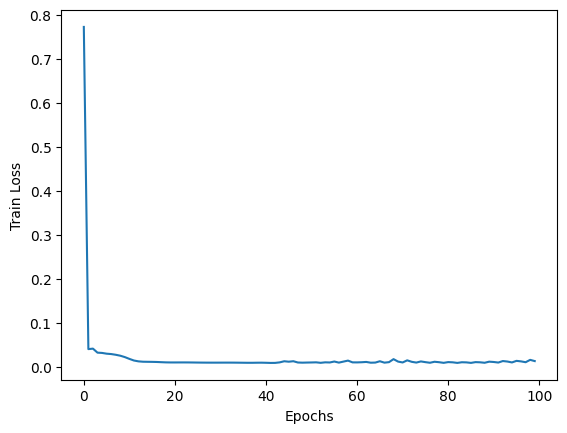

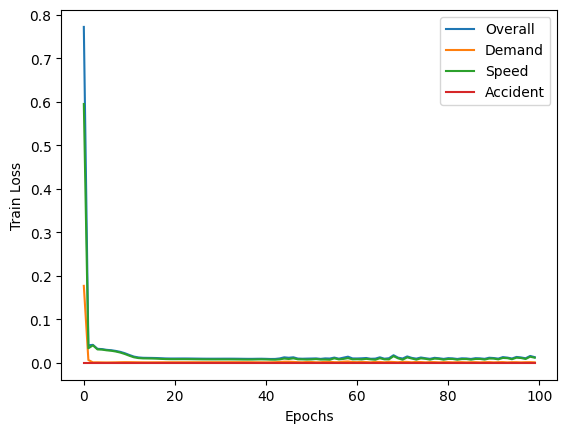

0.02174907422158867
[0.8517501354217529, 0.8496983051300049, 0.792033314704895, 0.8460515737533569] [0.8521624231336079, 0.855436688919654, 0.9253265565999332, 0.9212800187347442]
[0.7947155833244324, 0.7403037548065186, 0.75980544090271, 0.7110269665718079] [0.8065281899109792, 0.8145400593471809, 0.8439169139465875, 0.887833827893175]
[0.6395436525344849, 0.7851412892341614, 0.5447773337364197, 0.8454186916351318] [0.5862068965517241, 0.7931034482758621, 0.4482758620689655, 0.9310344827586207]
Best Configuration : [30, 0.1]
30 0.1
Epoch 1/100, Train Loss: 0.5589966522529721
Epoch 2/100, Train Loss: 0.03634234328637831
Epoch 3/100, Train Loss: 0.034145130834076554
Epoch 4/100, Train Loss: 0.03466713198577054
Epoch 5/100, Train Loss: 0.0333725317614153
Epoch 6/100, Train Loss: 0.033462439401773736
Epoch 7/100, Train Loss: 0.0326674098323565
Epoch 8/100, Train Loss: 0.031653647078201175
Epoch 9/100, Train Loss: 0.030104340810794383
Epoch 10/100, Train Loss: 0.02785675408085808
Epoch 11/

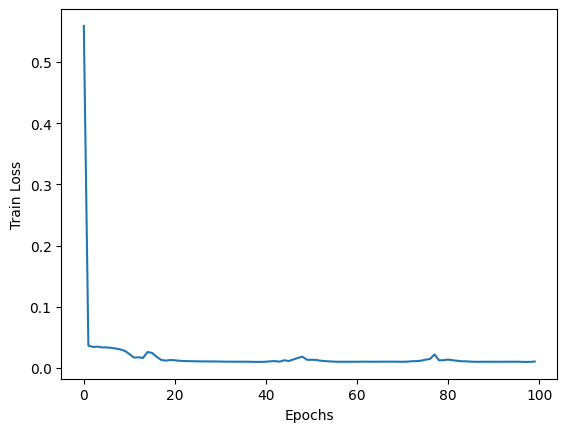

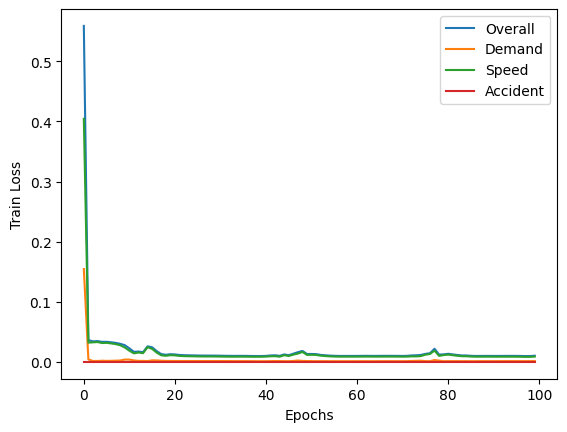

0.018442103784764186
[0.860599160194397, 0.8472232818603516, 0.7965025901794434, 0.8428105115890503] [0.8521624231336079, 0.855436688919654, 0.9253265565999332, 0.9212800187347442]
[0.8012766242027283, 0.7472702860832214, 0.7515633702278137, 0.7047020196914673] [0.8065281899109792, 0.8145400593471809, 0.8439169139465875, 0.887833827893175]
[0.5941667556762695, 0.761510968208313, 0.4392682909965515, 0.8752235174179077] [0.5862068965517241, 0.7931034482758621, 0.4482758620689655, 0.9310344827586207]


In [ ]:
def train_test_split(ep,speed,acc):
  train = []
  y1 = []
  y2 = []
  y3 = []
  for i in range(len(ep)-4):
    l = []
    for j in range(4):
      l.append([ep[i+j],speed[i+j],acc[i+j]])
    train.append(l)
    y1.append([ep[i+j]])
    y2.append([speed[i+j]])
    y3.append([acc[i+j]])

  test = train[-4:]
  train = train[:-4]
  yt1 = y1[-4:]
  y1 = y1[:-4]
  yt2 = y2[-4:]
  y2 = y2[:-4]
  yt3 = y3[-4:]
  y3 = y3[:-4]

  train = np.array(train)
  y1 = np.array(y1)
  y2 = np.array(y2)
  y3 = np.array(y3)
  test = np.array(test)
  yt1 = np.array(yt1)
  yt2 = np.array(yt2)
  yt3 = np.array(yt3)
  return train, y1, y2, y3, test, yt1, yt2, yt3

train, y1, y2, y3, test, yt1, yt2, yt3 = train_test_split(ep,speed,acc)
print(train.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)
print(test.shape)
print(yt1.shape)
print(yt2.shape)
print(yt3.shape)

# # print(train)
# l = []
# test = []
# for j in range(4):
#     l.append([ep[20+j],speed[20+j]])
# test.append(l)
# test = np.array(test)
# print(test.shape)

# Define the model architecture
class MultiTaskLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultiTaskLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, output_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # print(x)
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out1 = self.fc1(out[:, -1, :])
        out2 = self.fc2(out[:, -1, :])
        out3 = self.fc3(out[:, -1, :])
        return out1, out2, out3

class singleTaskLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(singleTaskLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # print(x)
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out1 = self.fc1(out[:, -1, :])
        return out1

# Define the training parameters
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Available device:- "+str(device))

input_size = 3
hidden_size = [30]
output_size = 1
lr = [0.1]
num_epochs = 100

history = []
best_model = []
m = 100
for h in hidden_size:
  for l in lr:
    # Create the model, loss function and optimizer
    print(h,l)
    model = MultiTaskLSTM(input_size, h, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=l)

    train_loss_overall = []
    train_loss_ep = []
    train_loss_speed = []
    train_accuracy = []
    train_loss_acc = []
    # Train the model
    for epoch in range(num_epochs):
        # Train the model
        train_loss = 0.0
        label1_loss = 0.0
        label2_loss = 0.0
        label3_loss = 0.0
        model.train()
        for i in range(train.shape[0]):
            x = torch.Tensor(train[i]).unsqueeze(0).to(device)
            # y1 = torch.Tensor([y1[i]]).to(device)
            # y2 = torch.Tensor([y2[i]]).to(device)
            # print(x,y1,y2)
            optimizer.zero_grad()
            y1_pred, y2_pred, y3_pred = model(x)
            loss1 = criterion(y1_pred, torch.Tensor([y1[i]]))
            loss2 = criterion(y2_pred, torch.Tensor([y2[i]]))
            loss3 = criterion(y3_pred, torch.Tensor([y3[i]]))
            loss = loss1 + loss2 + loss3
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            label1_loss += loss1.item()
            label2_loss += loss2.item()
            label2_loss += loss3.item()
        train_loss /= train.shape[0]
        label1_loss /= train.shape[0]
        label2_loss /= train.shape[0]
        label3_loss /= train.shape[0]
        train_loss_overall.append(train_loss)
        train_loss_ep.append(label1_loss)
        train_loss_speed.append(label2_loss)
        train_loss_acc.append(label3_loss)
        # Print the epoch results
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}')
    history.append(train_loss_overall)
    plt.plot(train_loss_overall)
    plt.xlabel("Epochs")
    plt.ylabel("Train Loss")
    plt.show()

    plt.plot(train_loss_overall)
    plt.plot(train_loss_ep)
    plt.plot(train_loss_speed)
    plt.plot(train_loss_acc)
    plt.xlabel("Epochs")
    plt.ylabel("Train Loss")
    plt.legend(['Overall', 'Demand', 'Speed', 'Accident'])
    plt.show()

    # Evaluate the model
    o1 = []
    o2 = []
    p1 = []
    p2 = []
    o3 = []
    p3 = []
    test_loss = 0.0
    for i in range(test.shape[0]):
        x = torch.Tensor(test[i]).unsqueeze(0).to(device)
        # y1 = torch.Tensor([y1[i]]).to(device)
        # y2 = torch.Tensor([y2[i]]).to(device)
        # print(x,y1,y2)
        optimizer.zero_grad()
        y1_pred, y2_pred, y3_pred = model(x)
        o1.append(y1_pred.item())
        o2.append(y2_pred.item())
        o3.append(y3_pred.item())
        p1.append(float(yt1[i]))
        p2.append(float(yt2[i]))
        p3.append(float(yt3[i]))
        loss1 = criterion(y1_pred, torch.Tensor([yt1[i]]))
        loss2 = criterion(y2_pred, torch.Tensor([yt2[i]]))
        loss3 = criterion(y3_pred, torch.Tensor([yt3[i]]))
        loss = loss1 + loss2 + loss3
        loss.backward()
        optimizer.step()
        test_loss += loss.item()
    test_loss /= test.shape[0]
    print(test_loss)
    if test_loss < m:
      m = test_loss
      best = [h,l]
    print(o1,p1)
    print(o2,p2)
    print(o3,p3)

print("Best Configuration : " +str(best))
for h in [best[0]]:
  for l in [best[1]]:
    # Create the model, loss function and optimizer
    print(h,l)
    model = MultiTaskLSTM(input_size, h, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=l)

    train_loss_overall = []
    train_loss_ep = []
    train_loss_speed = []
    train_accuracy = []
    train_loss_acc = []
    # Train the model
    for epoch in range(num_epochs):
        # Train the model
        train_loss = 0.0
        label1_loss = 0.0
        label2_loss = 0.0
        label3_loss = 0.0
        model.train()
        for i in range(train.shape[0]):
            x = torch.Tensor(train[i]).unsqueeze(0).to(device)
            # y1 = torch.Tensor([y1[i]]).to(device)
            # y2 = torch.Tensor([y2[i]]).to(device)
            # print(x,y1,y2)
            optimizer.zero_grad()
            y1_pred, y2_pred, y3_pred = model(x)
            loss1 = criterion(y1_pred, torch.Tensor([y1[i]]))
            loss2 = criterion(y2_pred, torch.Tensor([y2[i]]))
            loss3 = criterion(y3_pred, torch.Tensor([y3[i]]))
            loss = loss1 + loss2 + loss3
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            label1_loss += loss1.item()
            label2_loss += loss2.item()
            label2_loss += loss3.item()
        train_loss /= train.shape[0]
        label1_loss /= train.shape[0]
        label2_loss /= train.shape[0]
        label3_loss /= train.shape[0]
        train_loss_overall.append(train_loss)
        train_loss_ep.append(label1_loss)
        train_loss_speed.append(label2_loss)
        train_loss_acc.append(label3_loss)
        # Print the epoch results
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}')
    history.append(train_loss_overall)
    plt.plot(train_loss_overall)
    plt.xlabel("Epochs")
    plt.ylabel("Train Loss")
    plt.show()

    plt.plot(train_loss_overall)
    plt.plot(train_loss_ep)
    plt.plot(train_loss_speed)
    plt.plot(train_loss_acc)
    plt.xlabel("Epochs")
    plt.ylabel("Train Loss")
    plt.legend(['Overall', 'Demand', 'Speed', 'Accident'])
    plt.show()

    # Evaluate the model
    o1 = []
    o2 = []
    p1 = []
    p2 = []
    o3 = []
    p3 = []
    test_loss = 0.0
    for i in range(test.shape[0]):
        x = torch.Tensor(test[i]).unsqueeze(0).to(device)
        # y1 = torch.Tensor([y1[i]]).to(device)
        # y2 = torch.Tensor([y2[i]]).to(device)
        # print(x,y1,y2)
        optimizer.zero_grad()
        y1_pred, y2_pred, y3_pred = model(x)
        o1.append(y1_pred.item())
        o2.append(y2_pred.item())
        o3.append(y3_pred.item())
        p1.append(float(yt1[i]))
        p2.append(float(yt2[i]))
        p3.append(float(yt3[i]))
        loss1 = criterion(y1_pred, torch.Tensor([yt1[i]]))
        loss2 = criterion(y2_pred, torch.Tensor([yt2[i]]))
        loss3 = criterion(y3_pred, torch.Tensor([yt3[i]]))
        loss = loss1 + loss2 + loss3
        loss.backward()
        optimizer.step()
        test_loss += loss.item()
    test_loss /= test.shape[0]
    print(test_loss)
    if test_loss < m:
      m = test_loss
      best = [h,l]
    print(o1,p1)
    print(o2,p2)
    print(o3,p3)

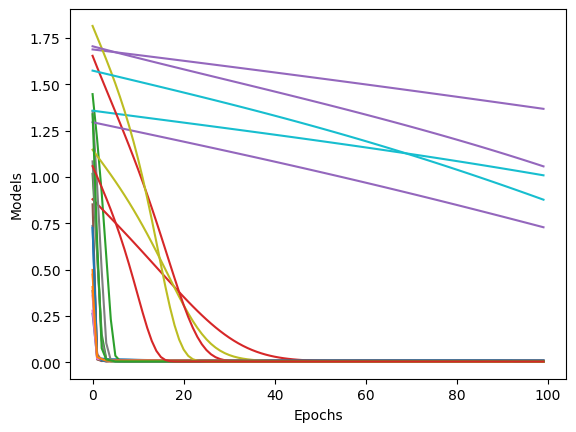

In [ ]:
for i in history:
  plt.plot(i)
  plt.xlabel("Epochs")
  plt.ylabel("Models")
plt.show()

In [ ]:
y_test = p1
y_pred = o1
from sklearn import metrics
print('\nMulti task learning model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))
print('R2:',1-((np.array(y_test)-np.array(y_pred))**2).sum()/((np.array(y_test)-np.array(y_test).mean())**2).sum())

y_test = p2
y_pred = o2
from sklearn import metrics
print('\nMulti task learning model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))
print('R2:',1-((np.array(y_test)-np.array(y_pred))**2).sum()/((np.array(y_test)-np.array(y_test).mean())**2).sum())

y_test = p3
y_pred = o3
from sklearn import metrics
print('\nMulti task learning model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))
print('R2:',1-((np.array(y_test)-np.array(y_pred))**2).sum()/((np.array(y_test)-np.array(y_test).mean())**2).sum())


Multi task learning model Performance Metrics
R^2= -0.14038412170928405
MAE: 0.03450087066120472
MSE: 0.0015704217091985623
RMSE: 0.03962854664504569
Accuracy/1-f2 score: 0.9554351197274683
Max_error: 0.06768813792546424
MSLE: 0.00043984257381758017
R2: -0.29671276131559243

Multi task learning model Performance Metrics
R^2= -0.7995678879090256
MAE: 0.03232450959236752
MSE: 0.0020999787542319353
RMSE: 0.04582552513863791
Accuracy/1-f2 score: 0.9453683992238486
Max_error: 0.08561771527949702
MSLE: 0.0006190268488666843
R2: -1.0694052410476775

Multi task learning model Performance Metrics
R^2= 0.961748401335563
MAE: 0.0326282351181425
MSE: 0.0013275056093908688
RMSE: 0.03643495038271452
Accuracy/1-f2 score: 0.9489862165548046
Max_error: 0.04831499066846123
MSLE: 0.00048271231551157633
R2: 0.9615023373276648


<ipython-input-5-b36b207dd778>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 20)                   1760      
                                                                 
 dense (Dense)               (1, 1)                    21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 19ms/step
Month=1, Predicted=0.901832, Expected=0.855437
1/1 [==============================] - 0s 17ms/step
Month=2, Predicted=0.929680, Expected=0.925327
1/1 [==============================] - 0s 20ms/step
Month=3, Predicted=1.034522, Expected=0.921280
1/1 [==============================] - 0s 18ms/step
Month=4, Predicted=0.942544, Expected=0.855446
Test RMSE: 0.075


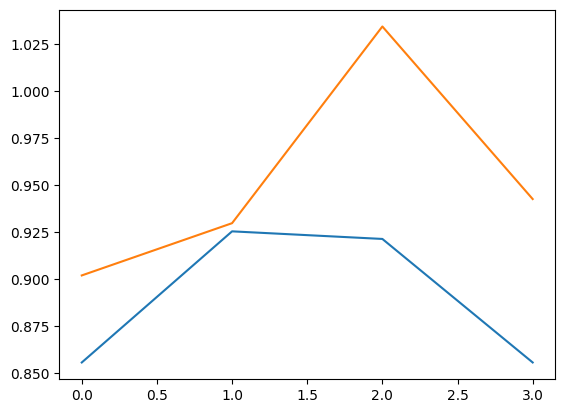

[0.9018316658234459, 0.9296803261723132, 1.0345219148559628, 0.9425439473433277]

Multi task learning model Performance Metrics


NameError: ignored

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
import numpy.linalg as la

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	print(model.summary())
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
# series = read_csv('data_speed.csv')

# transform data to be stationary
raw_values = ep
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-4], supervised_values[-4:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 20)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-4:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-4:])
pyplot.plot(predictions)
pyplot.show()

y_test = raw_values[-4:]
y_pred = predictions
print(y_pred)
print('\nMulti task learning model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))
print('R2:',1-((np.array(y_test)-np.array(y_pred))**2).sum()/((np.array(y_test)-np.array(y_test).mean())**2).sum())

<ipython-input-6-f38f9b8e8b7b>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 20)                   1760      
                                                                 
 dense_1 (Dense)             (1, 1)                    21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 30ms/step
Month=1, Predicted=0.826760, Expected=0.814540
1/1 [==============================] - 0s 35ms/step
Month=2, Predicted=0.814663, Expected=0.843917
1/1 [==============================] - 0s 29ms/step
Month=3, Predicted=0.836739, Expected=0.887834
1/1 [==============================] - 0s 27ms/step
Month=4, Predicted=0.864206, Expected=0.931157
Test RMSE: 0.045


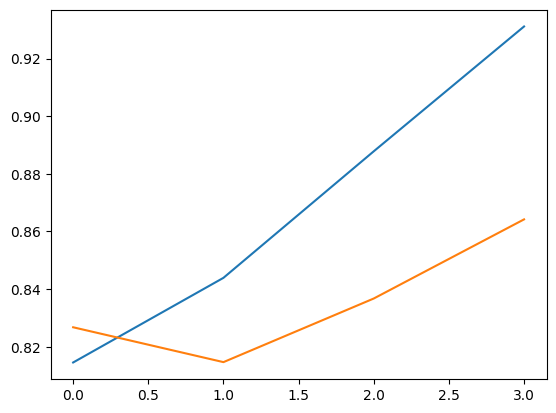

[0.8267600120086698, 0.8146625011451873, 0.8367391122554814, 0.8642057063406229]

Multi task learning model Performance Metrics


NameError: ignored

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
import numpy.linalg as la

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	print(model.summary())
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
# series = read_csv('data_speed.csv')

# transform data to be stationary
raw_values = speed
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-4], supervised_values[-4:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 20)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-4:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-4:])
pyplot.plot(predictions)
pyplot.show()

y_test = raw_values[-4:]
y_pred = predictions
print(y_pred)
print('\nMulti task learning model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))
print('R2:',1-((np.array(y_test)-np.array(y_pred))**2).sum()/((np.array(y_test)-np.array(y_test).mean())**2).sum())

<ipython-input-70-e0db17e4ed2d>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (1, 20)                   1760      
                                                                 
 dense_2 (Dense)             (1, 1)                    21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 22ms/step
Month=1, Predicted=0.743047, Expected=0.793103
1/1 [==============================] - 0s 22ms/step
Month=2, Predicted=0.771707, Expected=0.448276
1/1 [==============================] - 0s 21ms/step
Month=3, Predicted=0.674298, Expected=0.931034
1/1 [==============================] - 0s 21ms/step
Month=4, Predicted=0.633043, Expected=0.482759
Test RMSE: 0.221


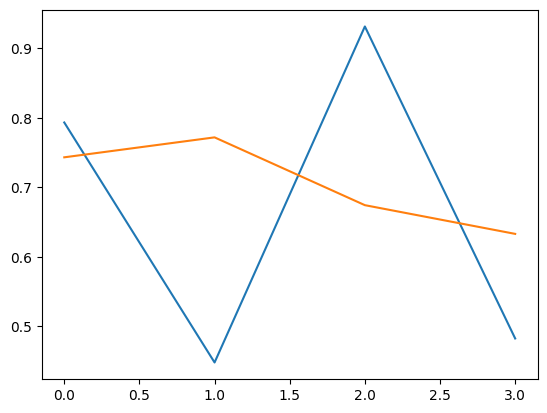

[0.743046839175553, 0.7717066381512017, 0.6742977684941784, 0.6330433467338825]

Multi task learning model Performance Metrics
R^2= -0.12718866666865836
MAE: 0.19512720637280367
MSE: 0.048903092591317254
RMSE: 0.22114043635508468
Accuracy/1-f2 score: 0.681626511701653
Max_error: 0.32343077608223614
MSLE: 0.017776133539453693
R2: -0.16880997141876564


In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
import numpy.linalg as la

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	print(model.summary())
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
# series = read_csv('data_speed.csv')

# transform data to be stationary
raw_values = acc
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-4], supervised_values[-4:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 20)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-4:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-4:])
pyplot.plot(predictions)
pyplot.show()

y_test = raw_values[-4:]
y_pred = predictions
print(y_pred)
print('\nMulti task learning model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))
print('R2:',1-((np.array(y_test)-np.array(y_pred))**2).sum()/((np.array(y_test)-np.array(y_test).mean())**2).sum())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=0.841658, expected=0.855437
predicted=0.850324, expected=0.925327
predicted=0.949882, expected=0.921280
predicted=0.936203, expected=0.855446
Test RMSE: 0.057


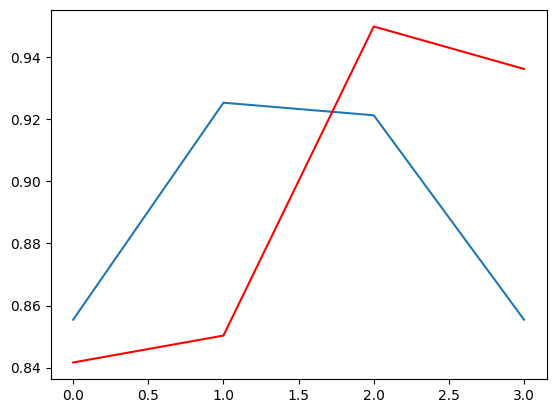

[0.855436688919654, 0.9253265565999332, 0.9212800187347442, 0.8554461110841374] [0.8416583042324028, 0.8503238989172781, 0.9498815660464143, 0.9362033389578875]

ARIMA Model Performance Metrics
R^2= -1.8285201506313427
MAE: 0.049534954388831626
MSE: 0.0032887552266314844
RMSE: 0.05734766975764128
Accuracy/1-f2 score: 0.9355659014329731
Max_error: 0.08075722787375017
MSLE: 0.0009169666398037629


In [ ]:
train = ep[:-4]
test = ep[-4:]
# print(test)
best_cfg=(0,3,2)
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=best_cfg)
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

y_test = test
y_pred = predictions
print(y_test,y_pred)
from sklearn import metrics
print('\nARIMA Model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))




In [ ]:
# Split into train and test set
train = ep[:-4]
test = ep[-4:]
# Fit the model
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=4).fit()
test_predictions = fitted_model.forecast(4)
# train.plot(legend=True,label='TRAIN')
# test.plot(legend=True,label='TEST',figsize=(20,20))
# test_predictions.plot(legend=True,label='PREDICTION')
# plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')
y_test = test
y_pred = test_predictions
# print(y_test,y_pred)
from sklearn import metrics
print('\nHW Model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(y_test-y_pred)/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))



HW Model Performance Metrics
R^2= -0.6249412566959007
MAE: 0.06632503311719934
MSE: 0.006273145390796695
RMSE: 0.07920319053419941
Accuracy/1-f2 score: 0.911009702621376
Max_error: 0.11374992729035571
MSLE: 0.001800247038826293


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.884529, expected=0.814540
predicted=0.792652, expected=0.843917
predicted=0.896392, expected=0.887834


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.954659, expected=0.931157
Test RMSE: 0.045


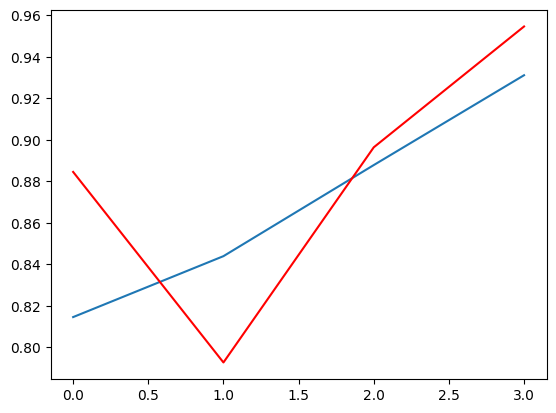

[0.8145400593471809, 0.8439169139465875, 0.887833827893175, 0.9311572700296735] [0.8845289891380524, 0.7926517980261997, 0.8963920734252524, 0.9546590309273753]

ARIMA Model Performance Metrics
R^2= 0.039086278810062214
MAE: 0.03832851303525964
MSE: 0.0020380346838706044
RMSE: 0.045144597504802327
Accuracy/1-f2 score: 0.9481385478455985
Max_error: 0.06998892979087157
MSLE: 0.0005985277040314469

HW Model Performance Metrics
R^2= -0.50190523996152
MAE: 0.09048742565450141
MSE: 0.011121481024748883
RMSE: 0.1054584326867647
Accuracy/1-f2 score: 0.8788508977075047
Max_error: 0.15664606342365872
MSLE: 0.003292189491155015


In [ ]:
train = speed[:-4]
test = speed[-4:]
# print(test)
best_cfg=(0,6,3)
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=best_cfg)
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

y_test = test
y_pred = predictions
print(y_test,y_pred)
from sklearn import metrics
print('\nARIMA Model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))


# Split into train and test set
train = speed[:-4]
test = speed[-4:]
# Fit the model
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=4).fit()
test_predictions = fitted_model.forecast(4)
# train.plot(legend=True,label='TRAIN')
# test.plot(legend=True,label='TEST',figsize=(20,20))
# test_predictions.plot(legend=True,label='PREDICTION')
# plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')
y_test = test
y_pred = test_predictions
# print(y_test,y_pred)
from sklearn import metrics
print('\nHW Model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(y_test-y_pred)/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=0.677191, expected=0.793103
predicted=0.613233, expected=0.448276


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.778807, expected=0.931034
predicted=0.544015, expected=0.482759
Test RMSE: 0.130


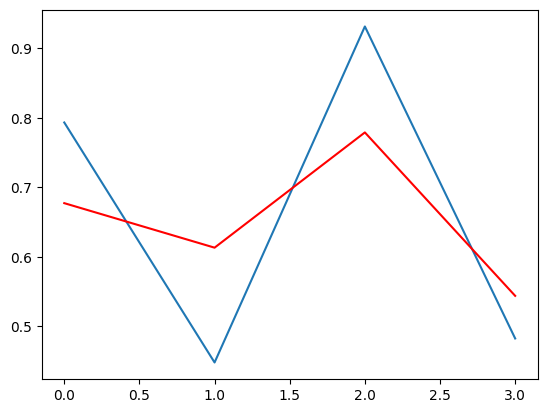

[0.7931034482758621, 0.4482758620689655, 0.9310344827586207, 0.4827586206896552] [0.6771907318251285, 0.6132330065198961, 0.7788074309503095, 0.5440145793841864]

ARIMA Model Performance Metrics
R^2= 0.598874227203307
MAE: 0.12358821785112666
MSE: 0.016892996279557433
RMSE: 0.12997305982224713
Accuracy/1-f2 score: 0.8128791951284078
Max_error: 0.16495714445093057

HW Model Performance Metrics
R^2= 0.2518361186895741
MAE: 0.17068709549920164
MSE: 0.031846571653013654
RMSE: 0.17845607765781937
Accuracy/1-f2 score: 0.7430787200730135
Max_error: 0.23884602826872514
MSLE: 0.011178712464094602


In [ ]:
train = acc[:-4]
test = acc[-4:]
# print(test)
best_cfg=(0,1,2)
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=best_cfg)
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

y_test = test
y_pred = predictions
print(y_test,y_pred)
from sklearn import metrics
print('\nARIMA Model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
# print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))


# Split into train and test set
train = acc[:-4]
test = acc[-4:]
# Fit the model
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=4).fit()
test_predictions = fitted_model.forecast(4)
# train.plot(legend=True,label='TRAIN')
# test.plot(legend=True,label='TEST',figsize=(20,20))
# test_predictions.plot(legend=True,label='PREDICTION')
# plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')
y_test = test
y_pred = test_predictions
# print(y_test,y_pred)
from sklearn import metrics
print('\nHW Model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(y_test-y_pred)/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))


In [ ]:
df1 = pd.read_csv('los_speed.csv')
df2 = pd.read_csv('sz_speed.csv')
e = df1.iloc[:1000,2]
s = df2.iloc[:1000,12]
m1 = max(e)
m2 = max(s)
e = [i/m1 for i in e]
s = [i/m2 for i in s]
print(len(e),e,m1)
print(len(s),s,m2)

1000 [0.9589285714285715, 0.9349206348571428, 0.8571428571428571, 0.8936507937142858, 0.9301587301428571, 0.9666666667142857, 0.9696428571428571, 0.9035714285714286, 0.9071428571428571, 0.8928571428571429, 0.9301587301428571, 0.9553571428571429, 0.8357142857142857, 0.9396825397142856, 0.7857142857142857, 0.9730158729999999, 0.8678571428571429, 0.9746031745714286, 0.9730158729999999, 0.9339285714285714, 0.8678571428571429, 0.8875, 0.919047619, 0.9857142857142858, 0.919047619, 0.9017857142857143, 0.9444444444285713, 0.9607142857142857, 0.9142857142857143, 0.9214285714285714, 0.8678571428571429, 0.8523809524285714, 0.9428571428571428, 0.8918367347142857, 0.9317460317142858, 0.9482142857142857, 0.9696428571428571, 0.9089285714285714, 0.9238095238571429, 0.8589285714285714, 0.9696428571428571, 0.8339285714285715, 0.9339285714285714, 0.9333333332857143, 0.9714285714285714, 0.9587301587142857, 0.9875, 0.9269841270000001, 0.9857142857142858, 0.8642857142857143, 0.9349206348571428, 0.9732142857

(896, 4, 2)
(896, 1)
(896, 1)
(100, 4, 2)
(100, 1)
(100, 1)
Available device:- cpu
30 0.001
Epoch 1/100, Train Loss: 0.054559396560266905
Epoch 2/100, Train Loss: 0.02243223418728592
Epoch 3/100, Train Loss: 0.016485061693496204
Epoch 4/100, Train Loss: 0.010810585870444811
Epoch 5/100, Train Loss: 0.007848236663333072
Epoch 6/100, Train Loss: 0.006280616893020127
Epoch 7/100, Train Loss: 0.0048123418720656475
Epoch 8/100, Train Loss: 0.003499972382285737
Epoch 9/100, Train Loss: 0.0023466846377525924
Epoch 10/100, Train Loss: 0.0014781497517211775
Epoch 11/100, Train Loss: 0.0008023302406718931
Epoch 12/100, Train Loss: 0.00039881390439132656
Epoch 13/100, Train Loss: 0.0001953914874534319
Epoch 14/100, Train Loss: 0.00012386420715774067
Epoch 15/100, Train Loss: 0.00010052483200334583
Epoch 16/100, Train Loss: 8.641679320447222e-05
Epoch 17/100, Train Loss: 7.672747742609037e-05
Epoch 18/100, Train Loss: 6.389930001211356e-05
Epoch 19/100, Train Loss: 5.1499417320854946e-05
Epoch 20/

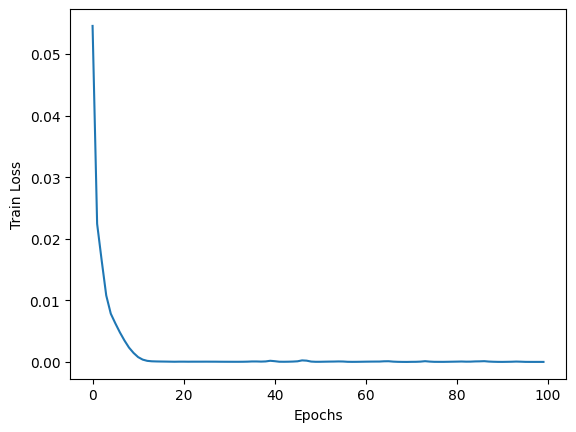

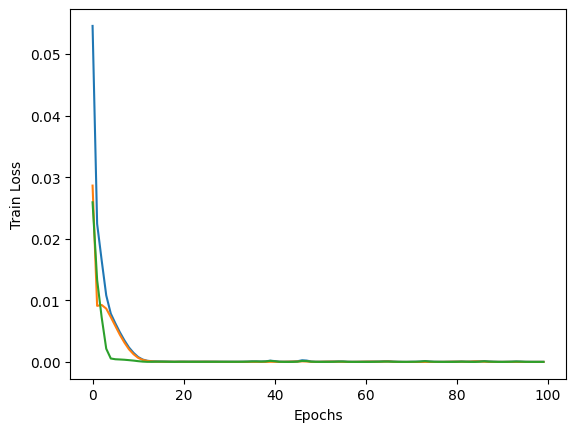

1.115543315048484e-05
[0.9252103567123413, 0.9582812786102295, 0.9737606048583984, 0.9135094881057739, 0.980862557888031, 0.9762228727340698, 0.9878448247909546, 0.9831623435020447, 0.9650810956954956, 0.9578235149383545, 0.9312108755111694, 0.9664555191993713, 0.9562886953353882, 0.992159366607666, 0.9274594187736511, 0.9642356634140015, 0.9071629047393799, 0.9363507032394409, 0.9061504602432251, 0.9307208061218262, 0.9933040142059326, 0.9193608164787292, 0.9134560823440552, 0.9816123843193054, 0.9397248029708862, 0.8984872102737427, 0.9686455726623535, 0.9594264030456543, 0.930014967918396, 0.945313572883606, 0.9335252046585083, 0.9810554385185242, 0.9702271223068237, 0.9527562856674194, 0.9670063853263855, 0.9647414684295654, 0.9639102220535278, 0.9755985736846924, 0.9524856209754944, 0.9837295413017273, 0.9694956541061401, 0.9677773714065552, 0.9717259407043457, 0.9785555005073547, 0.9783456921577454, 0.9677925109863281, 0.990333616733551, 0.9359568357467651, 0.9507149457931519, 0.

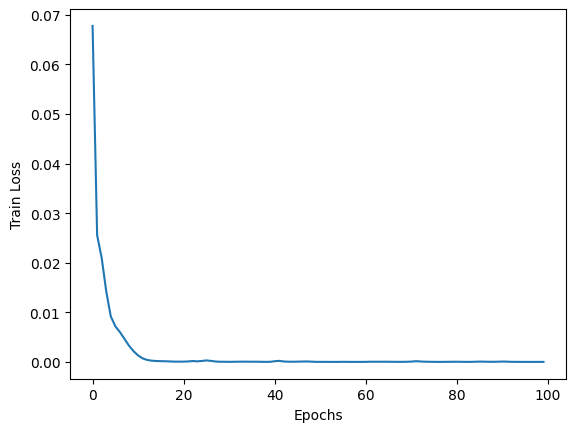

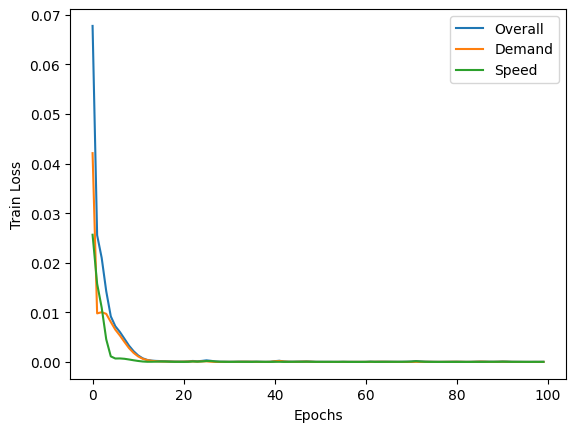

7.700214638610703e-06
[0.924058735370636, 0.9583345651626587, 0.9726462364196777, 0.9116728901863098, 0.9805043935775757, 0.9749569892883301, 0.9877492785453796, 0.9829390048980713, 0.965787410736084, 0.9596721529960632, 0.9335117936134338, 0.9688106179237366, 0.9575430154800415, 0.9920544624328613, 0.9259533882141113, 0.9617729187011719, 0.9050705432891846, 0.9358475208282471, 0.9062585830688477, 0.9321300983428955, 0.9946200251579285, 0.9207193851470947, 0.9126455783843994, 0.9803329706192017, 0.9398521184921265, 0.8981513381004333, 0.9678694009780884, 0.9597839117050171, 0.9303758144378662, 0.9441741704940796, 0.9337698221206665, 0.9818508625030518, 0.9707260727882385, 0.9528153538703918, 0.9657154083251953, 0.9641969799995422, 0.9640347957611084, 0.97564697265625, 0.9530830979347229, 0.9841430187225342, 0.9696190357208252, 0.9681707620620728, 0.9717144966125488, 0.978314995765686, 0.977958083152771, 0.9673921465873718, 0.9898367524147034, 0.935994029045105, 0.9509921669960022, 0.94

In [ ]:
def train_test_split(ep,speed):
  train = []
  y1 = []
  y2 = []
  for i in range(len(ep)-4):
    l = []
    for j in range(4):
      l.append([ep[i+j],speed[i+j]])
    train.append(l)
    y1.append([ep[i+j]])
    y2.append([speed[i+j]])

  test = train[-100:]
  train = train[:-100]
  yt1 = y1[-100:]
  y1 = y1[:-100]
  yt2 = y2[-100:]
  y2 = y2[:-100]

  train = np.array(train)
  y1 = np.array(y1)
  y2 = np.array(y2)

  test = np.array(test)
  yt1 = np.array(yt1)
  yt2 = np.array(yt2)
  return train, y1, y2, test, yt1, yt2

train, y1, y2, test, yt1, yt2 = train_test_split(e,s)
print(train.shape)
print(y1.shape)
print(y2.shape)

print(test.shape)
print(yt1.shape)
print(yt2.shape)

# # print(train)
# l = []
# test = []
# for j in range(4):
#     l.append([ep[20+j],speed[20+j]])
# test.append(l)
# test = np.array(test)
# print(test.shape)

# Define the model architecture
class MultiTaskLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultiTaskLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, output_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # print(x)
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out1 = self.fc1(out[:, -1, :])
        out2 = self.fc2(out[:, -1, :])
        return out1, out2

class singleTaskLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(singleTaskLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # print(x)
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out1 = self.fc1(out[:, -1, :])
        return out1

# Define the training parameters
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Available device:- "+str(device))

input_size = 2
hidden_size = [30]
output_size = 1
lr = [0.001]
num_epochs = 100

history = []
best_model = []
m = 100
for h in hidden_size:
  for l in lr:
    # Create the model, loss function and optimizer
    print(h,l)
    model = MultiTaskLSTM(input_size, h, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=l)

    train_loss_overall = []
    train_loss_ep = []
    train_loss_speed = []
    train_accuracy = []
    # Train the model
    for epoch in range(num_epochs):
        # Train the model
        train_loss = 0.0
        label1_loss = 0.0
        label2_loss = 0.0
        model.train()
        for i in range(train.shape[0]):
            x = torch.Tensor(train[i]).unsqueeze(0).to(device)
            # y1 = torch.Tensor([y1[i]]).to(device)
            # y2 = torch.Tensor([y2[i]]).to(device)
            # print(x,y1,y2)
            optimizer.zero_grad()
            y1_pred, y2_pred = model(x)
            loss1 = criterion(y1_pred, torch.Tensor([y1[i]]))
            loss2 = criterion(y2_pred, torch.Tensor([y2[i]]))
            loss = loss1 + loss2
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            label1_loss += loss1.item()
            label2_loss += loss2.item()
        train_loss /= train.shape[0]
        label1_loss /= train.shape[0]
        label2_loss /= train.shape[0]
        train_loss_overall.append(train_loss)
        train_loss_ep.append(label1_loss)
        train_loss_speed.append(label2_loss)
        # Print the epoch results
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}')
    history.append(train_loss_overall)
    plt.plot(train_loss_overall)
    plt.xlabel("Epochs")
    plt.ylabel("Train Loss")
    plt.show()

    plt.plot(train_loss_overall)
    plt.plot(train_loss_ep)
    plt.plot(train_loss_speed)
    plt.xlabel("Epochs")
    plt.ylabel("Train Loss")
    plt.show()

    # Evaluate the model
    o1 = []
    o2 = []
    p1 = []
    p2 = []
    test_loss = 0.0
    for i in range(test.shape[0]):
        x = torch.Tensor(test[i]).unsqueeze(0).to(device)
        # y1 = torch.Tensor([y1[i]]).to(device)
        # y2 = torch.Tensor([y2[i]]).to(device)
        # print(x,y1,y2)
        optimizer.zero_grad()
        y1_pred, y2_pred = model(x)
        o1.append(y1_pred.item())
        o2.append(y2_pred.item())
        p1.append(float(yt1[i]))
        p2.append(float(yt2[i]))
        loss1 = criterion(y1_pred, torch.Tensor([yt1[i]]))
        loss2 = criterion(y2_pred, torch.Tensor([yt2[i]]))
        loss = loss1 + loss2
        loss.backward()
        optimizer.step()
        test_loss += loss.item()
    test_loss /= test.shape[0]
    print(test_loss)
    if test_loss < m:
      m = test_loss
      best = [h,l]
    print(o1,p1)
    print(o2,p2)

print("Best Configuration : " +str(best))
model = MultiTaskLSTM(input_size, best[0], output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=best[1])

train_loss_overall = []
train_loss_ep = []
train_loss_speed = []
train_accuracy = []
# Train the model
for epoch in range(num_epochs):
        # Train the model
        train_loss = 0.0
        label1_loss = 0.0
        label2_loss = 0.0
        model.train()
        for i in range(train.shape[0]):
            x = torch.Tensor(train[i]).unsqueeze(0).to(device)
            # y1 = torch.Tensor([y1[i]]).to(device)
            # y2 = torch.Tensor([y2[i]]).to(device)
            # print(x,y1,y2)
            optimizer.zero_grad()
            y1_pred, y2_pred = model(x)
            loss1 = criterion(y1_pred, torch.Tensor([y1[i]]))
            loss2 = criterion(y2_pred, torch.Tensor([y2[i]]))
            loss = loss1 + loss2
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            label1_loss += loss1.item()
            label2_loss += loss2.item()
        train_loss /= train.shape[0]
        label1_loss /= train.shape[0]
        label2_loss /= train.shape[0]
        train_loss_overall.append(train_loss)
        train_loss_ep.append(label1_loss)
        train_loss_speed.append(label2_loss)
        # Print the epoch results
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}')
plt.plot(train_loss_overall)
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.show()

plt.plot(train_loss_overall)
plt.plot(train_loss_ep)
plt.plot(train_loss_speed)
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.legend(['Overall', 'Demand', 'Speed'])
plt.show()

# Evaluate the model
o1 = []
o2 = []
p1 = []
p2 = []
test_loss = 0.0
for i in range(test.shape[0]):
        x = torch.Tensor(test[i]).unsqueeze(0).to(device)
        # y1 = torch.Tensor([y1[i]]).to(device)
        # y2 = torch.Tensor([y2[i]]).to(device)
        # print(x,y1,y2)
        optimizer.zero_grad()
        y1_pred, y2_pred = model(x)
        o1.append(y1_pred.item())
        o2.append(y2_pred.item())
        p1.append(float(yt1[i]))
        p2.append(float(yt2[i]))
        loss1 = criterion(y1_pred, torch.Tensor([yt1[i]]))
        loss2 = criterion(y2_pred, torch.Tensor([yt2[i]]))
        loss = loss1 + loss2
        loss.backward()
        optimizer.step()
        test_loss += loss.item()
test_loss /= test.shape[0]
print(test_loss)
print(o1,p1)
print(o2,p2)

In [ ]:
y_test = p1
y_pred = o1
from sklearn import metrics
print('\nMulti task learning model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))
print('R2:',1-((np.array(y_test)-np.array(y_pred))**2).sum()/((np.array(y_test)-np.array(y_test).mean())**2).sum())

y_test = p2
y_pred = o2
from sklearn import metrics
print('\nMulti task learning model Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Accuracy/1-f2 score:',1-la.norm(np.array(y_test)-np.array(y_pred))/la.norm(y_test))
print('Max_error:',metrics.max_error(y_test,y_pred))
print('MSLE:',metrics.mean_squared_log_error(y_test,y_pred))
print('R2:',1-((np.array(y_test)-np.array(y_pred))**2).sum()/((np.array(y_test)-np.array(y_test).mean())**2).sum())


Multi task learning model Performance Metrics
R^2= 0.9958656255700246
MAE: 0.0012844203414218126
MSE: 3.0588810120279608e-06
RMSE: 0.0017489656977848253
Accuracy/1-f2 score: 0.998194005649774
Max_error: 0.005589217183768147
MSLE: 7.869033387995617e-07
R2: 0.9958486816823785

Multi task learning model Performance Metrics
R^2= 0.9997085284316064
MAE: 0.001449953402024602
MSE: 4.6413252920277655e-06
RMSE: 0.0021543735265797726
Accuracy/1-f2 score: 0.9954884064183035
Max_error: 0.009814583020840137
MSLE: 2.8835659897200267e-06
R2: 0.9997081060373645


In [ ]:
m = 1232.0

a = {(40.6039936, -73.8354124): 18.0, (40.7251022, -73.9795833): 654.0, (40.5589568, -74.19649520491512): 44.0, (40.6028866, -74.064902): 154.0, (40.7720145, -73.9302673): 718.0, (40.7788277, -73.92265804019786): 746.0, (40.7614516, -73.7897239): 264.0, (40.67592055, -73.78496487588887): 556.0, (40.6018495, -74.000501): 408.0, (40.703030749999996, -74.01578792289277): 338.0, (40.7110166, -74.0169369): 346.0, (40.6320062, -74.0232101): 342.0, (40.7684351, -73.7770774): 210.0, (40.7187387, -73.9569017): 830.0, (40.8700999, -73.8856912): 0.0, (40.7190882, -73.7296367): 324.0, (40.8552778, -73.8863889): 0.0, (40.6128203, -73.9823123): 612.0, (40.612782, -74.0008633): 462.0, (40.7997764, -73.9677716): 612.0, (40.68562615, -73.98417065807277): 778.0, (40.633993, -73.9968059): 604.0, (40.577621, -73.961376): 266.0, (40.6080187, -73.8158007): 42.0, (44.950874999999996, -93.3676488106517): 0.0, (40.8506558, -73.8665241): 0.0, (40.696084850000005, -73.9950278391265): 544.0, (40.6997716, -73.9753359): 740.0, (40.665306, -73.9124755): 1178.0, (40.7049856, -73.9289062): 882.0, (40.6942867, -73.92588360783884): 1024.0, (40.6945474, -73.7384653): 424.0, (40.643715, -73.9006921): 920.0, (40.6784201, -73.9948021): 638.0, (40.7992183, -73.9549001): 730.0, (40.7827725, -73.9653627406542): 682.0, (40.7164913, -73.9962504): 520.0, (40.84743325, -73.78642953814102): 56.0, (40.7181499, -73.9854353): 616.0, (40.6897222, -73.9652778): 954.0, (40.7596864, -73.9956133): 442.0, (40.8738889, -73.8294444): 308.0, (40.687547, -73.9973352): 554.0, (40.7876014, -73.8459682): 250.0, (40.6878211, -74.0013527): 502.0, (40.57580705, -73.99217527476975): 224.0, (40.7469593, -73.8601456): 502.0, (40.8391667, -73.8197222): 250.0, (40.83881315, -73.89239847631723): 0.0, (40.8366261, -73.8925344): 0.0, (40.6696946, -73.944948): 1232.0, (40.6694032, -73.9445802): 1230.0, (40.6899088, -73.8726597): 754.0, (40.768713, -73.7470765): 136.0, (40.69218, -73.985942): 690.0, (40.701519399999995, -73.98263570142457): 664.0, (40.6204716, -74.0116668): 382.0, (40.7471784, -73.982025): 542.0, (40.8240556, -73.9192925): 1024.0, (40.7612123, -73.8651358): 464.0, (40.757536599999995, -73.78430452865169): 308.0, (40.803225, -73.94172762319079): 822.0, (40.8009185, -73.9295154): 834.0, (40.6667702, -73.8823583): 886.0, (40.6646501, -73.894767): 1034.0, (40.8453781, -73.8909693): 0.0, (40.7292688, -73.9873613): 584.0, (40.7119945, -73.9671403): 770.0, (40.8884329, -73.8281895): 248.0, (40.7365804, -73.8783932): 540.0, (40.6495482, -73.9559714): 1062.0, (40.6053825, -73.7551326): 48.0, (40.7121392, -74.0131756): 378.0, (40.7017103, -74.0131489): 346.0, (40.6393842, -73.9642875): 932.0, (40.741059199999995, -73.98964162240998): 500.0, (40.6212155, -73.9348597): 852.0, (40.7654301, -73.8174291): 324.0, (40.8636237, -73.887748327829): 0.0, (40.7195942, -73.8448553): 634.0, (40.6907711, -73.9766245): 818.0, (40.7348246, -73.7934668): 490.0, (40.5791894, -74.17996750759133): 70.0, (40.7536941, -73.9905167): 488.0, (40.7470463, -73.7115199): 152.0, (40.7014917, -73.8868028): 860.0, (40.6791695, -73.9885041): 772.0, (40.7355189, -73.9840794): 586.0, (40.5961338, -73.9739426): 400.0, (40.5513353, -74.151201): 60.0, (40.548161, -74.1262534): 48.0, (40.65220295, -73.99107685810596): 754.0, (40.7237134, -73.9509714): 846.0, (40.7317312, -73.9976185): 478.0, (40.7299438, -73.9973576): 490.0, (40.8241451, -73.9500618): 826.0, (40.5871898, -73.8111059): 48.0, (40.83653245, -73.92959563928643): 0.0, (40.84591775, -73.92984478686536): 0.0, (40.7134361, -73.7670772): 520.0, (40.58611335, -73.95731014951107): 328.0, (40.6578815, -73.8362459): 450.0, (40.7268035, -74.0079833): 402.0, (40.8126008, -73.8840247): 774.0, (40.8692579, -73.9204949): 0.0, (40.87227365, -73.9254270915026): 0.0, (40.7556561, -73.8857755): 502.0, (40.7029134, -73.8006429): 620.0, (40.71334555, -73.78251095420785): 534.0, (40.642947899999996, -73.7793733748521): 228.0, (40.6462149, -73.970694): 950.0, (40.7095633, -73.8307965): 614.0, (40.7159628, -73.8328014): 604.0, (40.8725702, -73.9026619): 0.0, (40.7395463, -73.9770832): 634.0, (40.7757145, -73.87336398511545): 430.0, (40.6667703, -73.7515212): 318.0, (40.7672618, -73.966522): 640.0, (40.767694649999996, -73.96471689217381): 646.0, (40.7737889, -73.9819984): 564.0, (40.7210061, -73.9947024): 526.0, (40.7424147, -73.9481036): 756.0, (40.750607, -73.9402599): 710.0, (40.8162916, -73.8962205): 962.0, (40.7159357, -73.9868057): 612.0, (40.6105009, -73.94765849957773): 662.0, (40.5766309, -73.9409798480918): 236.0, (40.8157775, -73.951554): 748.0, (40.8762983, -73.9104292): 0.0, (40.6367701, -74.1587547): 92.0, (40.723158, -73.912637): 652.0, (40.7408956, -74.0052344): 368.0, (40.8183333, -73.9027778): 1038.0, (40.718215650000005, -73.87867154730415): 656.0, (40.75925755, -73.97995686116377): 560.0, (40.7598219, -73.9724708): 584.0, (40.7649371, -73.9850825): 544.0, (40.7498417, -73.984251): 528.0, (40.6188823, -73.9654889): 772.0, (40.81, -73.9625): 632.0, (40.8256703, -73.9152416): 0.0, (40.8034452, -73.917871): 864.0, (40.8525714, -73.90534040085426): 0.0, (40.7481574, -73.97875): 564.0, (40.7430865, -73.9611197): 672.0, (40.8772593, -73.8768626): 0.0, (40.753991, -73.765966): 282.0, (40.563994, -74.1159754): 58.0, (40.6757317, -73.9124338): 1138.0, (40.5854595, -73.96487147170009): 326.0, (40.67677, -73.8437461): 604.0, (40.6701033, -73.9859723): 838.0, (40.8332047, -73.8609723): 0.0, (40.8662112, -73.7895774): 76.0, (40.852548, -73.827938): 386.0, (40.857229, -73.8676281): 0.0, (40.6331592, -74.1365318): 118.0, (40.68035905, -73.957633): 1072.0, (40.6778708, -73.9684725): 1006.0, (40.661774300000005, -73.97108902901994): 1024.0, (40.7175718, -73.7359328): 360.0, (40.742901950000004, -73.82517691472333): 518.0, (40.758403, -73.93916185149254): 724.0, (40.793938999999995, -73.91761017748043): 794.0, (40.6751032, -74.0095841): 444.0, (40.72286495, -73.86210223976741): 626.0, (40.6994253, -73.8309672): 652.0, (40.7080556, -73.9141667): 842.0, (40.79193175, -73.88349371727949): 562.0, (40.5805104, -73.8361535): 18.0, (40.76133675, -73.95028526170718): 702.0, (40.6620479, -73.7354097): 252.0, (40.542642799999996, -74.20698511828994): 40.0, (40.6984364, -73.7606881): 594.0, (40.64178665, -74.07841152113366): 154.0, (40.821982, -73.8187004): 184.0, (40.7057505, -74.0029056): 446.0, (40.5912161, -73.9445822): 362.0, (40.72288, -73.9987505): 494.0, (40.69567495, -73.79420266473011): 606.0, (40.6701035, -73.8190231): 482.0, (33.775115, -79.59923): 0.0, (40.683938, -73.7379765): 392.0, (40.8806984, -73.9077054123841): 0.0, (40.6279568, -74.0751652): 174.0, (40.6478541, -73.87951545688418): 736.0, (40.7745459, -73.9037477): 648.0, (40.67439655, -73.94404613465176): 1214.0, (40.7398242, -73.9354153): 744.0, (40.6364667, -74.0083234): 484.0, (40.6474105, -73.9959794): 662.0, (40.714497800000004, -73.98854356054915): 590.0, (40.7360717, -73.9901888): 544.0, (40.8540951, -73.9198195): 0.0, (40.768631299999996, -73.96473710434782): 646.0, (40.77946795, -73.9582649374): 708.0, (40.7797929, -73.9819947): 558.0, (40.7772311, -73.99005935788361): 480.0, (40.8970755, -73.8865797057321): 0.0, (40.8539384, -73.8611454): 0.0, (40.840346800000006, -73.9407446392122): 0.0, (40.6345481, -74.1120867): 152.0, (40.75391085, -74.00053573096068): 412.0, (40.8263962, -73.9211598): 0.0, (40.8375001, -73.8734632): 0.0, (40.7341857, -74.00558): 410.0, (40.621215, -74.1318094): 162.0, (40.7945457, -73.8184674): 140.0, (40.796708, -73.779396): 80.0, (40.65348695, -73.97719596197135): 928.0, (40.6892698, -73.8579131): 722.0, (40.8937765, -73.8610822): 0.0, (40.7453798, -73.9054145): 580.0, (40.7119004, -74.012527): 384.0, (40.783311, -73.9448639): 732.0, (39.2115779, -119.7325651): 0.0}

In [ ]:
acc = []
for i in a:
  acc.append(a[i])
acc.append(0.0)
acc.append(0.0)
df = pd.read_csv('poi_vs_ep.csv')
print(len(acc),len(df))
d = []
for i in range(len(df)):
  d.append([df.iloc[i][1],df.iloc[i][2],df.iloc[i][3],acc[i]])
print(d)
pd.DataFrame(d,columns=['loc','ep','poi','acc']).to_csv('poi_vs_ep.csv')

218 218
[[2.0, 0.1513353115727003, 0.6064947467626611, 18.0], [4.0, 0.9050445103857568, 0.8958776975395875, 654.0], [5.0, 0.0415430267062314, 0.6064947467626611, 44.0], [6.0, 0.2106824925816023, 0.7277936961151933, 154.0], [7.0, 0.8338278931750742, 0.7375517441455234, 718.0], [8.0, 0.7863501483679525, 0.702257075294633, 746.0], [9.0, 0.142433234421365, 0.6498157998429249, 264.0], [10.0, 0.1988130563798219, 0.8783343566456381, 556.0], [11.0, 0.3175074183976261, 0.6064947467626611, 408.0], [12.0, 0.7952522255192879, 1.0, 338.0], [13.0, 0.7626112759643917, 0.8683300517337957, 346.0], [14.0, 0.456973293768546, 0.6689280292322317, 342.0], [16.0, 0.115727002967359, 0.6064947467626611, 210.0], [17.0, 0.9614243323442137, 0.7486872951889225, 830.0], [18.0, 0.3234421364985163, 0.7501382392573718, 0.0], [19.0, 0.0771513353115727, 0.6531481888679808, 324.0], [20.0, 0.3531157270029673, 0.669235582718315, 0.0], [21.0, 0.4094955489614243, 0.6462648937930842, 612.0], [22.0, 0.373887240356083, 0.632121